In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
alldata = pd.read_csv('datasets_74977_169835_StudentsPerformance.csv')
alldata

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data = pd.DataFrame({
    "male": [0 for i in range(2)],
    "female": [0 for i in range(2)],
}, index = ["standard", "free/reduced"])

for i in range (len(alldata)):
    data["male" if (alldata["gender"][i] == "male") else "female"][alldata["lunch"][i]] += 1
data

,male,female
standard,316,329
free/reduced,166,189


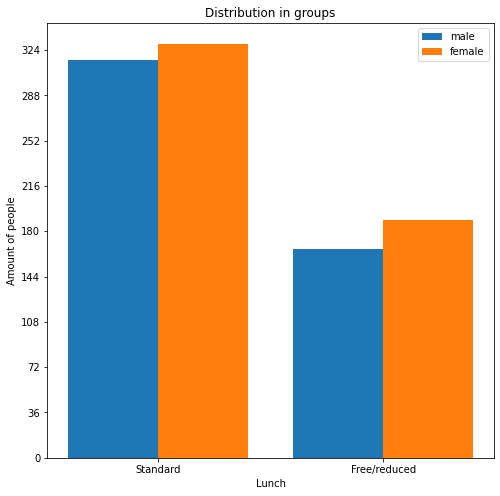

In [5]:
x = np.arange(len(data))
width = 0.4
y = [i for i in np.linspace(0,324,10)]
labels = ["Standard", "Free/reduced"]

fig, ax = plt.subplots(figsize=(8,8))
fig.height = 10
rects1 = ax.bar(x - width/2, data["male"], width, label='male')
rects2 = ax.bar(x + width/2, data["female"], width, label='female')

ax.set_ylabel('Amount of people')
ax.set_xlabel('Lunch')
ax.set_title('Distribution in groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y)

ax.legend()

In [7]:
def Pirson(significant_level, datareal, dataexpected):
    if not abs(sum(datareal) - sum(dataexpected)) < 0.000001:
        dataexpected = dataexpected / sum(dataexpected) * sum(datareal)
        
    PTable = pd.read_excel('Pirson_.xlsx')
    PTable = PTable.loc[1:, :]
    PTable = PTable.rename(columns={"Unnamed: 0": "Level", "Рівень значимості": 0.01, "Unnamed: 2": 0.05})
    PTable.set_index("Level", inplace=True)
    
    chi_squared = sum([ (x_r - x_exp)**2 / x_exp for
                  x_r, x_exp in zip(datareal, dataexpected)])
    
    r = len(datareal) - 1
    
    check_value = PTable.loc[r, significant_level]
    return check_value < chi_squared

PTable = pd.read_excel('Pirson_.xlsx')

In [8]:
keys = data.keys()
sum_1 = sum(data[keys[0]])
sum_2 = sum(data[keys[1]])

data["% Male"] = [data[keys[0]][i]/sum_1 * 100 for i in range(len(data))]
data["% Female"] = [data[keys[1]][i]/sum_2 * 100 for i in range(len(data))]

data

,male,female,% Male,% Female
standard,316,329,65.560166,63.513514
free/reduced,166,189,34.439834,36.486486


In [9]:
significant_01 = Pirson(0.01, data['male'], data['female'] )
significant_05 = Pirson(0.05, data['male'], data['female'] )

result = pd.DataFrame ( 
    [significant_01, significant_05],
    columns = ["Statistical discrepancy"],
    index = ['0.01', '0.05'])

result


,Statistical discrepancy
0.01,False
0.05,False
